### **Veri Seti Seçimi ve Tanıtımı**

In [ ]:
#pip
%pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Veri setini yükle

df = pd.read_csv('heart_disease_uci.csv')

# İlk 5 satırı göster
print("Veri Seti İlk 5 Satır:")
display(df.head())

Veri Seti İlk 5 Satır:


id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [5]:
print(f"Veri Seti Boyutu (Satır, Sütun): {df.shape}")
print("-" * 30)
print("Veri Tipleri ve Bellek Kullanımı:")
df.info()

Veri Seti Boyutu (Satır, Sütun): (920, 16)
------------------------------
Veri Tipleri ve Bellek Kullanımı:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# Her sütundaki eksik değer sayısı
print("Eksik Değer Sayıları:")
print(df.isnull().sum())

print("-" * 30)
# Sayısal verilerin istatistiksel özeti (Min, Max, Ortalama)
# Bu çıktı chol veya trestbps gibi değerlerdeki anormallikleri (örn: 0 değeri) görmemizi sağlar.
print("\nİstatistiksel Özet:")
display(df.describe().T)

Eksik Değer Sayıları:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
------------------------------

İstatistiksel Özet:


count        mean         std   min     25%    50%     75%    max
id        920.0  460.500000  265.725422   1.0  230.75  460.5  690.25  920.0
age       920.0   53.510870    9.424685  28.0   47.00   54.0   60.00   77.0
trestbps  861.0  132.132404   19.066070   0.0  120.00  130.0  140.00  200.0
chol      890.0  199.130337  110.780810   0.0  175.00  223.0  268.00  603.0
thalch    865.0  137.545665   25.926276  60.0  120.00  140.0  157.00  202.0
oldpeak   858.0    0.878788    1.091226  -2.6    0.00    0.5    1.50    6.2
ca        309.0    0.676375    0.935653   0.0    0.00    0.0    1.00    3.0
num       920.0    0.995652    1.142693   0.0    0.00    1.0    2.00    4.0

Hedef Değişken Sınıf Dağılımı:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


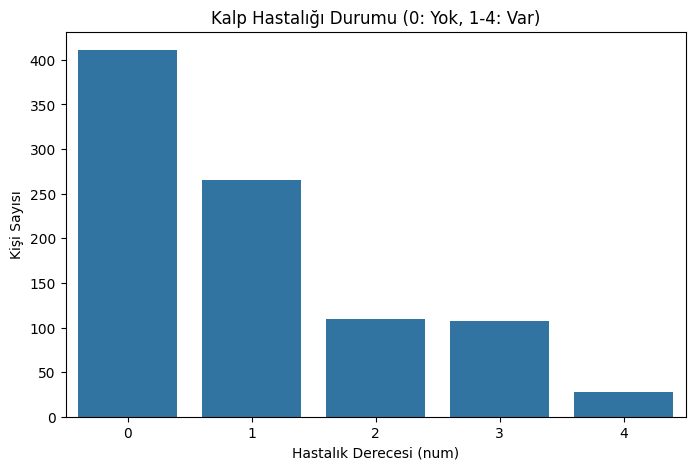

In [7]:
#Hedef Değişken Analizi
import matplotlib.pyplot as plt
import seaborn as sns

# Hedef değişken num
# Dağılımı sayısal olarak gör
print("Hedef Değişken Sınıf Dağılımı:")
print(df['num'].value_counts())

# Grafiksel olarak göster
plt.figure(figsize=(8, 5))
sns.countplot(x='num', data=df)
plt.title("Kalp Hastalığı Durumu (0: Yok, 1-4: Var)")
plt.xlabel("Hastalık Derecesi (num)")
plt.ylabel("Kişi Sayısı")
plt.show()

### **Veri Ön İşleme (Preprocessing)**

In [8]:
#Temizlik ve Hedef Dönüşümü
import numpy as np

# 1. Gereksiz sütunları kaldır (id ve dataset )
df = df.drop(['id', 'dataset'], axis=1)

# 2. Hedef Değişkeni (num) Binary Yapma
# 0 -> 0 Hastalık Yok
# 1, 2, 3, 4 -> 1 Hastalık Var
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop('num', axis=1) # Eski 'num' sütununu kaldır

# 3. Anormal '0' değerlerini NaN yapma
# 'chol' (kolesterol) ve 'trestbps' (tansiyon) 0 olamaz. Bunlar eksik veri kabul edilmeli.
cols_with_potential_zeros = ['trestbps', 'chol']
for col in cols_with_potential_zeros:
    df[col] = df[col].replace(0, np.nan)

print("Temizlik sonrası veri boyutu:", df.shape)
print("Yeni Hedef Değişken Dağılımı:\n", df['target'].value_counts())

Temizlik sonrası veri boyutu: (920, 14)
Yeni Hedef Değişken Dağılımı:
 target
1    509
0    411
Name: count, dtype: int64


In [9]:
# Eksik Verileri Doldurma
from sklearn.impute import SimpleImputer

# Sayısal ve Kategorik sütunları ayır
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('target') # Hedef değişkeni hariç tut
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


# Sayısal -> Medyan
num_imputer = SimpleImputer(strategy='median')
df[numeric_features] = num_imputer.fit_transform(df[numeric_features])

# Kategorik -> Mod
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

print("Eksik veri kontrolü (Hepsi 0 olmalı):")
print(df.isnull().sum().sum())

Eksik veri kontrolü (Hepsi 0 olmalı):
0


In [10]:
#Encoding (Kategorik -> Sayısal)

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("Encoding sonrası veri seti boyutu:", df_encoded.shape)
print("Yeni sütunlardan örnekler:", df_encoded.columns[:5])

Encoding sonrası veri seti boyutu: (920, 19)
Yeni sütunlardan örnekler: Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')


In [11]:
# HÜCRE 8: Normalizasyon (Scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Hedef değişkeni ayır
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Özellikleri ölçeklendir
X_scaled_array = scaler.fit_transform(X)

# Tekrar DataFrame formatına çevir (Sütun isimlerini korumak için)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

print("Veriler standardize edildi. İlk 5 satır:")
display(X_scaled.head())

Veriler standardize edildi. İlk 5 satır:


age  trestbps      chol    thalch   oldpeak        ca  sex_Male  \
0  1.007386  0.717803 -0.236157  0.489727  1.368109 -0.361400  0.516931   
1  1.432034  1.554856  0.787855 -1.181478  0.611589  4.411152  0.516931   
2  1.432034 -0.677285 -0.313441 -0.345875  1.651804  2.820301  0.516931   
3 -1.752828 -0.119250  0.092300  1.961979  2.502889 -0.361400  0.516931   
4 -1.328180 -0.119250 -0.796466  1.365120  0.517024 -0.361400 -1.934494   

   cp_atypical angina  cp_non-anginal  cp_typical angina  fbs_True  \
0           -0.482953       -0.533775           4.358899  2.380476   
1           -0.482953       -0.533775          -0.229416 -0.420084   
2           -0.482953       -0.533775          -0.229416 -0.420084   
3           -0.482953        1.873447          -0.229416 -0.420084   
4            2.070593       -0.533775          -0.229416 -0.420084   

   restecg_normal  restecg_st-t abnormality  exang_True  slope_flat  \
0       -1.227523                 -0.491493   -0.760292   -1.568007   
1       -1.227523                 -0.491493    1.315283    0.637752   
2       -1.227523                 -0.491493    1.315283    0.637752   
3        0.814649                 -0.491493   -0.760292   -1.568007   
4       -1.227523                 -0.491493   -0.760292   -1.568007   

   slope_upsloping  thal_normal  thal_reversable defect  
0        -0.532094    -1.692792               -0.513553  
1        -0.532094     0.590740               -0.513553  
2        -0.532094    -1.692792                1.947220  
3        -0.532094     0.590740               -0.513553  
4         1.879367     0.590740               -0.513553

En Önemli 10 Özellik:
               Feature  Importance
3               thalch    0.144842
2                 chol    0.117884
0                  age    0.117539
4              oldpeak    0.114034
7   cp_atypical angina    0.085400
13          exang_True    0.083414
1             trestbps    0.082841
6             sex_Male    0.046840
8       cp_non-anginal    0.041146
16         thal_normal    0.031682


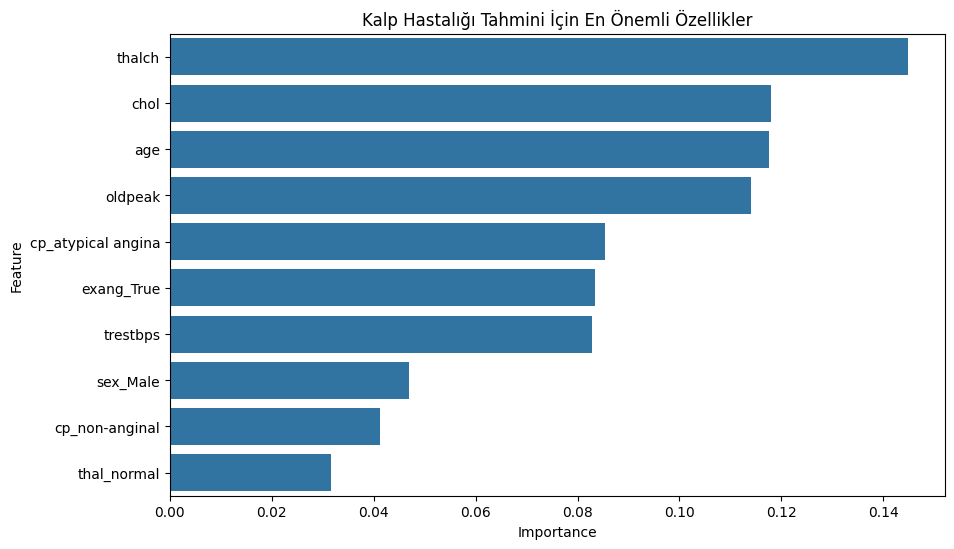

In [22]:
#özellik Önem Düzeyi
from sklearn.ensemble import RandomForestClassifier


# random Forest ile  modeli eğitip önem derecelerini almak değişkenlerin
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, y)

# önem derecelerini bir dataFrame koy
feature_importance = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


print("En Önemli 10 Özellik:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Kalp Hastalığı Tahmini İçin En Önemli Özellikler")
plt.show()

In [23]:
# en iyi özellikleri seç modele gönder overfitting azaltır

from sklearn.feature_selection import SelectKBest, mutual_info_classif
feature_selector = SelectKBest(mutual_info_classif, k=10)


### **Veri Analizi**

Sınıf Dağılımı:
 target
1    509
0    411
Name: count, dtype: int64

Sınıf Oranları (%):
target
1    55.326087
0    44.673913
Name: proportion, dtype: float64


C:\Users\Fatih\AppData\Local\Temp\ipykernel_9012\3725671187.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


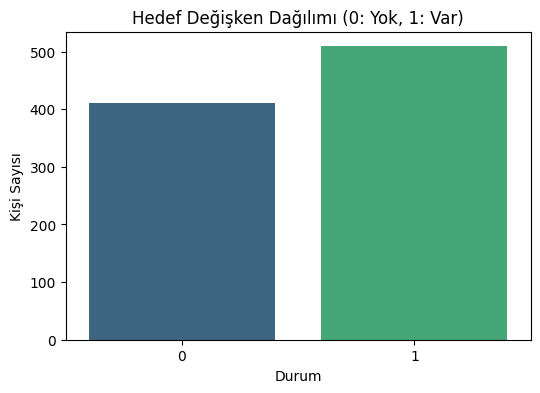

In [24]:
#Sınıf Dağılımı Analizi

# Sınıf sayılarını hesapla
class_counts = y.value_counts()
print("Sınıf Dağılımı:\n", class_counts)

# Oransal dağılım
print("\nSınıf Oranları (%):")
print(y.value_counts(normalize=True) * 100)

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="viridis")
plt.title("Hedef Değişken Dağılımı (0: Yok, 1: Var)")
plt.xlabel("Durum")
plt.ylabel("Kişi Sayısı")
plt.show()

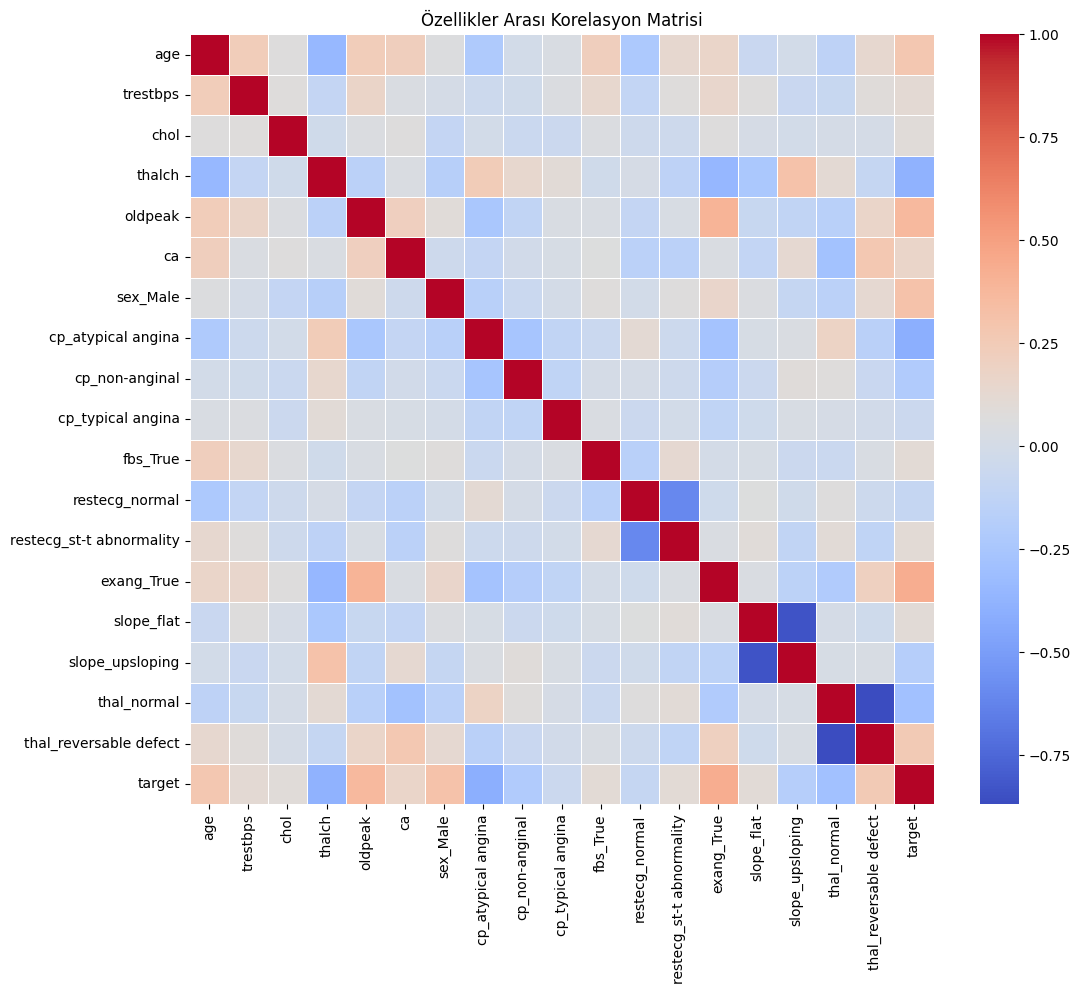

In [ ]:
#korelasyon Isı Haritası
plt.figure(figsize=(12, 10))

# Encoding yapılmış veri seti üzerinden korelasyonu hesapla
# Hedef değişkeni de analize dahil etmek için geçici olarak birleştiriyoruz
analyze_df = X_scaled.copy()
analyze_df['target'] = y.values

# Korelasyon matrisi
corr_matrix = analyze_df.corr()

# Isı haritası çiz
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.show()

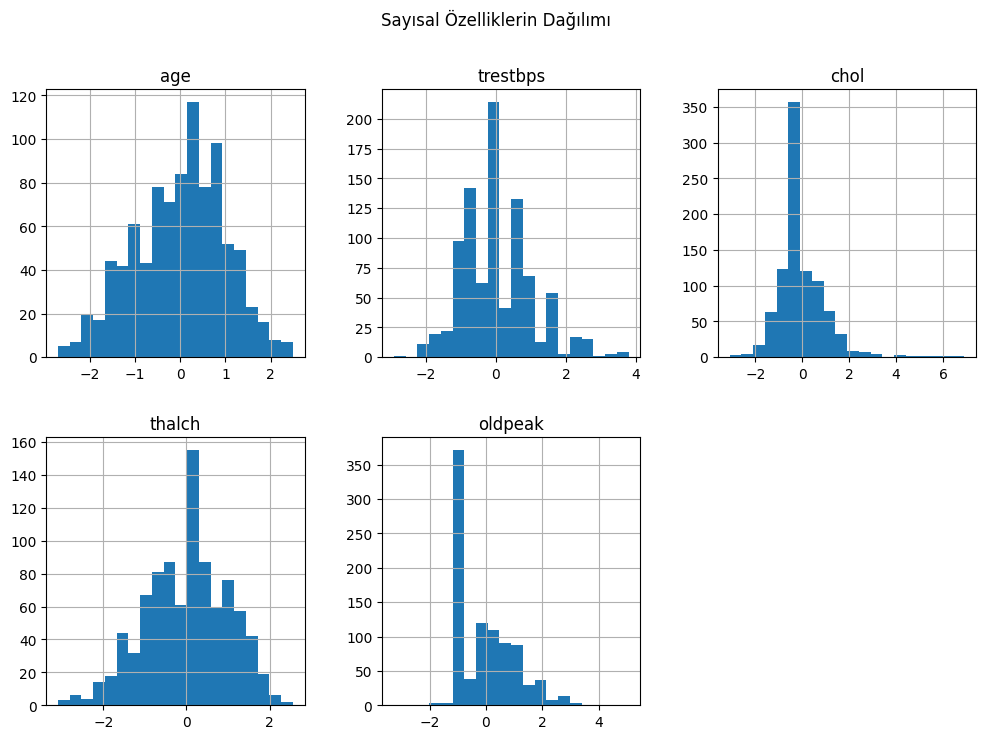

In [16]:
#Sayısal Özelliklerin Histogramları
#sayısal kökenli ana sütunlar
numeric_cols_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# X_scaled üzerinden bu sütunları bulup çizelim
X_scaled[numeric_cols_to_plot].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Sayısal Özelliklerin Dağılımı")
plt.show()

### **SVM modelinin eğitilmesi**

In [17]:
#Veri Bölme
from sklearn.model_selection import train_test_split

#ölçeklenmiş veriyi (X_scaled) kullan
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")

Eğitim Seti Boyutu: (736, 18)
Test Seti Boyutu: (184, 18)


In [18]:
#SVM Eğitimi
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Parametreler
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Modeli tanımla
# class_weight='balanced' parametresi eklendi. SMOTE yerine mdodel içinde dengeleme
svm_model = SVC(class_weight='balanced', random_state=42)

# Grid Search
grid = GridSearchCV(svm_model, param_grid, refit=True, cv=5, verbose=2)

# Modeli eğit
print("Model orijinal veri üzerinde eğitiliyor (class_weight='balanced')...")
grid.fit(X_train, y_train)

# Sonuçlar
print("\nEn İyi Parametreler:", grid.best_params_)
print("En İyi Cross-Validation Skoru:", grid.best_score_)

Model orijinal veri üzerinde eğitiliyor (class_weight='balanced')...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf

In [ ]:
# performans Değerlendirme
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred = grid.predict(X_test)

# Sonuçları raporla
print("Test Seti Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("-" * 30)
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred))

Test Seti Doğruluk (Accuracy): 0.8206521739130435
------------------------------

Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184



Eğitim Seti Doğruluğu: 0.8601
Test Seti Doğruluğu  : 0.8207
DURUM: Model dengeli görünüyor (Overfitting yok).


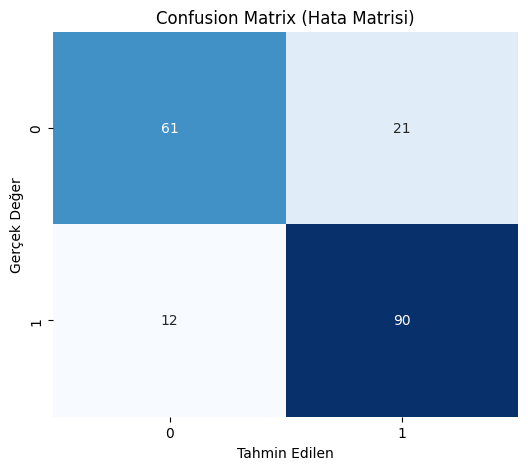

In [ ]:
# overfitting Kontrolü ve Görselleştirme

# Eğitim seti üzerindeki başarıyı da ölç
y_train_pred = grid.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Eğitim Seti Doğruluğu: {train_acc:.4f}")
print(f"Test Seti Doğruluğu  : {test_acc:.4f}")

if train_acc > test_acc + 0.10:
    print("UYARI: Modelde Overfitting (Aşırı Öğrenme) riski var. Eğitim başarısı testten çok yüksek.")
else:
    print("DURUM: Model dengeli görünüyor (Overfitting yok).")

# confusion Matrix Görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix (Hata Matrisi)')
plt.show()

In [ ]:
#Modeli Kaydetme
import joblib

# 1. Eğitilmiş en iyi SVM modelini kaydet

joblib.dump(grid.best_estimator_, 'svm_kalp_modeli.pkl')

# 2. Normalizasyon yapan Scaler nesnesini kaydet
# Yeni verileri de aynı standartlara (mean, std) getirmek için bu şarttır.
joblib.dump(scaler, 'scaler.pkl')

# 3. Eğitimde kullanılan sütun isimlerini kaydet
# One-Hot Encoding (get_dummies) kullandığımız için sütun sırası karışmamalı.
joblib.dump(X.columns, 'model_sutunlari.pkl')

print("Model ve gerekli dosyalar başarıyla kaydedildi!")
print("- svm_kalp_modeli.pkl")
print("- scaler.pkl")
print("- model_sutunlari.pkl")

#   svm_kalp_modeli.pkl beyin eğittiğim makine öğrenmesi
#   scaler.pkl veriyi normalize ederken kullandığımız ortalama ve standart sapma değerleri
#   model_sutunlari.pkl modelin eğitim sırasında kullandığı sütunlar

Model ve gerekli dosyalar başarıyla kaydedildi!
Dosyalar çalışma dizininizde şunlar olarak görünmeli:
- svm_kalp_modeli.pkl
- scaler.pkl
- model_sutunlari.pkl


In [26]:
#Kayıtlı Modeli Yükleyip Test Etme


# 1. Kaydedilen dosyaları geri yükle (Load)
loaded_model = joblib.load('svm_kalp_modeli.pkl')
loaded_scaler = joblib.load('scaler.pkl')
model_columns = joblib.load('model_sutunlari.pkl')

print("Model ve yardımcı dosyalar başarıyla yüklendi.")

# 2. örnek bir hasta verisi oluşturmak
# bu verileri değiştirerek farklı senaryoları test edebiliriz
yeni_hasta = {
    'age': 63,
    'sex': 'Male',             # Kategorik
    'cp': 'typical angina',    # Kategorik
    'trestbps': 145,
    'chol': 233,
    'fbs': True,               # Kategorik/Boolean
    'restecg': 'lv hypertrophy', # Kategorik
    'thalch': 150,
    'exang': False,            # Kategorik/Boolean
    'oldpeak': 2.3,
    'slope': 'downsloping',    # Kategorik
    'ca': 0.0,
    'thal': 'fixed defect'     # Kategorik
}

# 3. Veriyi DataFrame'e çevir
df_yeni = pd.DataFrame([yeni_hasta])

print("\nHasta Verisi (Ham):")
display(df_yeni)

# 4. Ön İşleme (Preprocessing)

#Veriyi modelimize uygun hale getiriyoruz
# Bu işlem ham veriyi 0 ve 1'lere çevirir.
df_yeni_encoded = pd.get_dummies(df_yeni)


# Tek bir hasta verisinde bazı sütunlar olmayabilir bu da hataya sebep olur bunlara sıfır ata
df_yeni_ready = df_yeni_encoded.reindex(columns=model_columns, fill_value=0)


# kaydettiğimiz scaler'ı kullanarak veriyi 0-1 arasına sıkıştırıyoruz.
df_final = loaded_scaler.transform(df_yeni_ready)

tahmin = loaded_model.predict(df_final)
olasilik = loaded_model.decision_function(df_final) # SVM'de olasılık yerine karar mesafesi döner

# 6. Sonucu Yazdır
print("-" * 30)
print("SONUÇ RAPORU:")
if tahmin[0] == 1:
    print(f"TAHMİN: KALP HASTALIĞI RİSKİ VAR (Sınıf: 1)")
else:
    print(f"TAHMİN: RİSK DÜŞÜK / HASTALIK YOK (Sınıf: 0)")

print(f"Karar Fonksiyonu Değeri: {olasilik[0]:.4f} (Pozitif ise hasta, negatif ise sağlıklı)")

Model ve yardımcı dosyalar başarıyla yüklendi.

Hasta Verisi (Ham):


age   sex              cp  trestbps  chol   fbs         restecg  thalch  \
0   63  Male  typical angina       145   233  True  lv hypertrophy     150   

   exang  oldpeak        slope   ca          thal  
0  False      2.3  downsloping  0.0  fixed defect

------------------------------
SONUÇ RAPORU:
TAHMİN: RİSK DÜŞÜK / HASTALIK YOK (Sınıf: 0)
Karar Fonksiyonu Değeri: -1.3334 (Pozitif ise hasta, negatif ise sağlıklı)


c:\Users\Fatih\anaconda3\envs\datamining\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Fatih\anaconda3\envs\datamining\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
